In [1]:
import pandas as pd
import numpy as np

In [2]:
Omics_EPCG_TPMlogp1 = pd.read_csv('OmicsExpressionProteinCodingGenesTPMLogp1.csv')
Omics_EPCG_TPMlogp1 = Omics_EPCG_TPMlogp1.rename(columns={'Unnamed: 0': 'Depmap ID'})

In [3]:
df1 = pd.read_excel('preprocessed_data_v1.xlsx')
sig_genes = pd.read_excel('Genes with sig expression correlations.xlsx')
sig_genes = sig_genes.rename(columns={'Gene': 'Depmap ID'})
sig_genes.head()

,Depmap ID
0,POP4 (10775)
1,DST (667)
2,TTC30A (92104)
3,TIPARP (25976)
4,RER1 (11079)


In [47]:
df1.shape

(567, 33)

In [4]:
Omics = Omics_EPCG_TPMlogp1.transpose()
Omics = Omics.reset_index()


row_index = 0
# Set the new header
new_header = Omics.iloc[row_index]  # Take the row to be used as header
df = Omics[1:]  # Remove the header row from the data
df.columns = new_header  # Set new header

# Reset index if desired
df.reset_index(drop=True, inplace=True)
df.head()

,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105),4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102),0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813),7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147),2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732),4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [6]:
sig_genes['Depmap ID'] = sig_genes['Depmap ID'] + '_Expression'
sig_genes.head()

,Depmap ID
0,POP4 (10775)_Expression
1,DST (667)_Expression
2,TTC30A (92104)_Expression
3,TIPARP (25976)_Expression
4,RER1 (11079)_Expression


In [7]:
df['Depmap ID'] = df['Depmap ID'] + '_Expression'
df.head()

C:\Users\Big Brain Computer\AppData\Local\Temp\ipykernel_19488\1646599126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Depmap ID'] = df['Depmap ID'] + '_Expression'


,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,TSPAN6 (7105)_Expression,4.331992,4.567424,3.15056,5.08534,6.729417,4.27277,3.337711,0.056584,4.017031,...,6.345361,4.018812,4.328406,5.995032,3.533563,0.056584,3.111031,4.390943,5.05745,4.249445
1,TNMD (64102)_Expression,0.0,0.584963,0.0,0.0,0.0,0.189034,0.0,0.0,0.0,...,3.401903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DPM1 (8813)_Expression,7.36466,7.106641,7.379118,7.154211,6.537917,7.023255,5.927659,6.094236,6.534497,...,7.211694,6.700856,7.059182,6.238978,6.488483,6.604368,7.031329,7.013239,7.815191,6.175724
3,SCYL3 (57147)_Expression,2.792855,2.543496,2.333424,2.545968,2.456806,2.555816,1.944858,3.971773,2.226509,...,2.533563,2.137504,1.891419,2.304511,1.823749,3.266037,1.541019,1.887525,2.538538,2.31904
4,C1orf112 (55732)_Expression,4.471187,3.50462,4.228049,3.084064,3.867896,3.841973,2.678072,3.731183,3.02148,...,4.374344,2.531069,3.529821,4.0,3.308885,4.973152,3.664483,3.252476,3.893362,3.825786


In [8]:
Express_genes = pd.merge(sig_genes, df, on = 'Depmap ID', how = 'inner')
Express_genes.head()

,Depmap ID,ACH-001113,ACH-001289,ACH-001339,ACH-001538,ACH-000242,ACH-000708,ACH-000327,ACH-000233,ACH-000461,...,ACH-001578,ACH-000036,ACH-000973,ACH-001128,ACH-000750,ACH-000285,ACH-002669,ACH-001858,ACH-001997,ACH-000052
0,POP4 (10775)_Expression,5.749802,6.043301,5.773205,4.791293,5.465322,6.109987,6.123708,5.30305,5.777946,...,4.562548,6.07767,6.770433,5.764739,5.655066,6.344296,6.022146,5.431623,5.835419,5.839456
1,DST (667)_Expression,7.498091,5.094658,5.631395,6.513964,6.751678,3.014355,6.098453,4.152183,5.459759,...,5.060912,6.683275,6.09043,6.0581,5.82985,2.280956,5.675534,6.169725,5.396434,4.654206
2,TTC30A (92104)_Expression,2.899176,2.060047,1.883621,0.85599,0.757023,0.992768,0.669027,1.280956,1.422233,...,1.906891,2.185867,0.918386,2.996389,0.879706,1.250962,0.948601,1.757023,2.687061,2.82171
3,TIPARP (25976)_Expression,4.524189,5.358256,6.125982,4.876271,3.192194,3.693766,2.803227,4.185074,3.9241,...,2.0,3.808385,2.939227,2.283922,2.989139,3.139142,5.638364,4.961623,5.602291,5.918863
4,RER1 (11079)_Expression,5.727648,6.523248,6.634448,6.60659,5.603775,6.560256,6.013462,6.387673,7.505176,...,6.391287,6.063071,6.433794,6.35632,6.0054,6.044394,6.486071,6.612205,6.825404,6.408542


In [9]:
Express_genes_2 = Express_genes.transpose()
Express_genes_2 = Express_genes_2.reset_index()


row_index = 0
# Set the new header
new_header = Express_genes_2.iloc[row_index]  # Take the row to be used as header
df2 = Express_genes_2[1:]  # Remove the header row from the data
df2.columns = new_header  # Set new header

# Reset index if desired
df2.reset_index(drop=True, inplace=True)
df2.head()

,Depmap ID,POP4 (10775)_Expression,DST (667)_Expression,TTC30A (92104)_Expression,TIPARP (25976)_Expression,RER1 (11079)_Expression,LRIF1 (55791)_Expression,PSMD10 (5716)_Expression,MLF1 (4291)_Expression,WLS (79971)_Expression,...,KDM6B (23135)_Expression,CCNG1 (900)_Expression,UGT2B28 (54490)_Expression,C20orf96 (140680)_Expression,PTH2 (113091)_Expression,SETMAR (6419)_Expression,PANK1 (53354)_Expression,CTC1 (80169)_Expression,ARRB2 (409)_Expression,ACADSB (36)_Expression
0,ACH-001113,5.749802,7.498091,2.899176,4.524189,5.727648,4.479619,6.95245,5.5157,6.072749,...,2.292782,3.898208,0.0,1.163499,0.0,2.927896,1.443607,1.594549,4.599318,2.946731
1,ACH-001289,6.043301,5.094658,2.060047,5.358256,6.523248,4.719183,6.414305,4.962086,6.821455,...,2.952334,7.552823,0.0,3.092546,0.0,3.375735,4.003602,3.377124,5.1918,3.64501
2,ACH-001339,5.773205,5.631395,1.883621,6.125982,6.634448,4.489286,5.778997,4.639811,6.73647,...,2.604071,6.405652,0.0,2.046142,0.0,2.825786,1.545968,1.761285,3.903038,2.147307
3,ACH-001538,4.791293,6.513964,0.85599,4.876271,6.60659,5.263786,6.569552,6.28244,5.324811,...,3.008989,5.795715,0.0,1.395063,0.0,2.226509,2.025029,2.344828,2.952334,2.087463
4,ACH-000242,5.465322,6.751678,0.757023,3.192194,5.603775,3.68594,5.562853,2.232661,6.072963,...,3.570463,7.00169,0.124328,2.477677,0.0,4.516015,2.179511,2.718088,3.69488,3.617063


In [10]:
df3 = pd.merge(df1,df2, on = 'Depmap ID', how = 'inner')
df3.head()

,Unnamed: 0,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,...,KDM6B (23135)_Expression,CCNG1 (900)_Expression,UGT2B28 (54490)_Expression,C20orf96 (140680)_Expression,PTH2 (113091)_Expression,SETMAR (6419)_Expression,PANK1 (53354)_Expression,CTC1 (80169)_Expression,ARRB2 (409)_Expression,ACADSB (36)_Expression
0,0,BEN,ACH-000603,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,4.011675,4.006298,0.014355,3.801159,0.0,2.432959,1.992768,3.494416,5.520737,2.937344
1,1,BXPC3,ACH-000535,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,2.981853,5.288359,0.0,2.053111,0.0,2.726831,2.235727,2.392317,3.760221,1.344828
2,2,EOL1,ACH-000198,1.0,1.0,insensitive,0,0.0,0.0,0.0,...,3.904002,6.131343,0.0,3.8885,0.0,3.636915,2.531069,4.082362,6.828581,3.134221
3,3,HA1E,ACH-001310,1.0,1.0,insensitive,0,0.0,0.0,0.0,...,2.713696,7.262565,0.0,2.983678,0.0,3.802193,2.636915,3.957915,5.108943,2.797013
4,4,HCC1438,ACH-000891,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,2.613532,5.415488,0.0,3.397803,0.0,3.703765,2.885574,2.817623,4.684258,2.435629


In [11]:
df3 = df3.drop(columns=['Unnamed: 0'])

In [26]:
df_crisp = pd.read_csv('CRISPRGeneDependency.csv')

In [27]:
df_crisp.head()

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
1,ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
2,ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
3,ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
4,ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [28]:
df_crisp.columns = [col.split()[0] for col in df_crisp.columns]

In [32]:
df_crisp.head()

,Depmap ID,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,ACH-000001,0.063550,0.017803,0.016486,0.066293,0.029758,0.000815,0.023883,0.050448,0.003767,...,0.068175,0.032055,0.004142,0.001468,0.003247,0.195908,0.039109,0.011347,0.007978,0.437038
1,ACH-000004,0.016670,0.044559,0.035885,0.026364,0.028644,0.020426,0.000832,0.045910,0.002606,...,0.093742,0.493753,0.002883,0.007575,0.005719,0.014641,0.414198,0.006575,0.001914,0.046494
2,ACH-000005,0.040757,0.022681,0.005047,0.008861,0.064044,0.031699,0.004941,0.047061,0.036375,...,0.152467,0.362731,0.029695,0.024869,0.017247,0.078232,0.067087,0.028369,0.019612,0.070876
3,ACH-000007,0.018149,0.051901,0.006559,0.004373,0.012135,0.003699,0.007898,0.107051,0.066871,...,0.197652,0.550288,0.017119,0.001285,0.006273,0.036344,0.464681,0.013396,0.229044,0.511280
4,ACH-000009,0.026656,0.115825,0.011635,0.011006,0.014439,0.021746,0.011194,0.130169,0.018793,...,0.246275,0.295764,0.042915,0.001720,0.055031,0.087271,0.739790,0.010245,0.038641,0.345928


In [30]:
df_crisp = df_crisp.rename(columns={'Unnamed:':'Depmap ID'})

In [20]:
df_genes = pd.read_excel('Cripsr_dep Sig Genes.xlsx')

In [21]:
df_genes = df_genes.rename(columns={'Gene': 'Depmap ID'})
df_genes['Depmap ID'] = df_genes['Depmap ID'] + '_CRISPR Dep'
df_genes.head()

,Depmap ID
0,MDM4_CRISPR Dep
1,PPM1D_CRISPR Dep
2,MDM2_CRISPR Dep
3,ANKRD49_CRISPR Dep
4,PPM1G_CRISPR Dep


In [52]:
Crisp = df_crisp.transpose()
Crisp = Crisp.reset_index()


row_index = 0
# Set the new header
new_header = Crisp.iloc[row_index]  # Take the row to be used as header
df = Crisp[1:]  # Remove the header row from the data
df.columns = new_header  # Set new header

# Reset index if desired
df.reset_index(drop=True, inplace=True)
df.head()

,Depmap ID,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
0,A1BG,0.06355,0.01667,0.040757,0.018149,0.026656,0.014322,0.051554,0.011085,0.037418,...,0.039191,0.038195,0.044891,0.045101,0.017998,0.037761,0.027691,0.023949,0.066682,0.031437
1,A1CF,0.017803,0.044559,0.022681,0.051901,0.115825,0.029423,0.023948,0.088432,0.0271,...,0.154897,0.075934,0.07429,0.037648,0.060896,0.061002,0.075054,0.019232,0.030364,0.047718
2,A2M,0.016486,0.035885,0.005047,0.006559,0.011635,0.008681,0.011076,0.019454,0.016767,...,0.036757,0.013829,0.016123,0.01746,0.003543,0.015757,0.016911,0.027686,0.006662,0.006595
3,A2ML1,0.066293,0.026364,0.008861,0.004373,0.011006,0.002485,0.011459,0.01297,0.004328,...,0.006023,0.019568,0.016481,0.015227,0.013478,0.021822,0.017315,0.00069,0.032514,0.004101
4,A3GALT2,0.029758,0.028644,0.064044,0.012135,0.014439,0.05554,0.012938,0.062523,0.021963,...,0.017764,0.102906,0.202115,0.076445,0.186831,0.122563,0.093939,0.188515,0.060327,0.073002


In [53]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()
# Now safely modify the DataFrame
df.loc[:, 'Depmap ID'] = df['Depmap ID'] + '_CRISPR Dep'

In [54]:
df.head()

,Depmap ID,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
0,A1BG_CRISPR Dep,0.06355,0.01667,0.040757,0.018149,0.026656,0.014322,0.051554,0.011085,0.037418,...,0.039191,0.038195,0.044891,0.045101,0.017998,0.037761,0.027691,0.023949,0.066682,0.031437
1,A1CF_CRISPR Dep,0.017803,0.044559,0.022681,0.051901,0.115825,0.029423,0.023948,0.088432,0.0271,...,0.154897,0.075934,0.07429,0.037648,0.060896,0.061002,0.075054,0.019232,0.030364,0.047718
2,A2M_CRISPR Dep,0.016486,0.035885,0.005047,0.006559,0.011635,0.008681,0.011076,0.019454,0.016767,...,0.036757,0.013829,0.016123,0.01746,0.003543,0.015757,0.016911,0.027686,0.006662,0.006595
3,A2ML1_CRISPR Dep,0.066293,0.026364,0.008861,0.004373,0.011006,0.002485,0.011459,0.01297,0.004328,...,0.006023,0.019568,0.016481,0.015227,0.013478,0.021822,0.017315,0.00069,0.032514,0.004101
4,A3GALT2_CRISPR Dep,0.029758,0.028644,0.064044,0.012135,0.014439,0.05554,0.012938,0.062523,0.021963,...,0.017764,0.102906,0.202115,0.076445,0.186831,0.122563,0.093939,0.188515,0.060327,0.073002


In [55]:
df.shape

(18443, 1101)

In [56]:
Crisp_genes = pd.merge(df_genes, df, on = 'Depmap ID', how = 'inner')
Crisp_genes.head()

,Depmap ID,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
0,MDM4_CRISPR Dep,0.190525,0.195459,0.054644,0.944389,0.218345,0.850634,0.107526,0.097806,0.066857,...,0.026963,0.247901,0.171947,0.237296,0.144766,0.092477,0.973536,0.057842,0.30918,0.279582
1,PPM1D_CRISPR Dep,0.006474,0.103267,0.013037,0.953788,0.022858,0.782538,0.047439,0.017853,0.050789,...,0.028293,0.219635,0.149864,0.146234,0.057863,0.0849,0.999844,0.028387,0.362582,0.536755
2,MDM2_CRISPR Dep,0.342259,0.11799,0.058091,1.0,0.480414,0.997178,0.471059,0.212476,0.437032,...,0.480114,0.678885,0.618941,0.406038,0.407457,0.459982,0.999858,0.662679,0.999983,0.992012
3,ANKRD49_CRISPR Dep,0.023764,0.494849,0.021084,0.951838,0.495265,0.358618,0.415111,0.581145,0.085686,...,0.191248,0.056574,0.009372,0.227246,0.039567,0.005885,0.361196,0.081776,0.841913,0.194463
4,PPM1G_CRISPR Dep,0.093836,0.367858,0.093917,0.957023,0.328779,0.936986,0.209308,0.01318,0.00683,...,0.013564,0.372581,0.265374,0.287861,0.33202,0.195131,0.339426,0.236932,0.989573,0.986148


In [57]:
Crisp_genes.shape

(20, 1101)

In [58]:
df_fin = Crisp_genes.transpose()
df_fin = df_fin.reset_index()


row_index = 0
# Set the new header
new_header = df_fin.iloc[row_index]  # Take the row to be used as header
df = df_fin[1:]  # Remove the header row from the data
df.columns = new_header  # Set new header

# Reset index if desired
df.reset_index(drop=True, inplace=True)
df.head()

,Depmap ID,MDM4_CRISPR Dep,PPM1D_CRISPR Dep,MDM2_CRISPR Dep,ANKRD49_CRISPR Dep,PPM1G_CRISPR Dep,UBE2D3_CRISPR Dep,RPL22L1_CRISPR Dep,CEND1_CRISPR Dep,FKBPL_CRISPR Dep,...,DDX31_CRISPR Dep,FANCC_CRISPR Dep,PUM3_CRISPR Dep,ZWILCH_CRISPR Dep,IGFL4_CRISPR Dep,GTF2F2_CRISPR Dep,ANK3_CRISPR Dep,NUP54_CRISPR Dep,VSIG4_CRISPR Dep,PCDHGA10_CRISPR Dep
0,ACH-000001,0.190525,0.006474,0.342259,0.023764,0.093836,0.6508,0.043017,0.11414,0.009116,...,0.035417,0.036007,0.006983,0.068175,0.000439,0.990086,0.089604,0.993665,0.006968,0.02808
1,ACH-000004,0.195459,0.103267,0.11799,0.494849,0.367858,0.960499,0.062467,0.000935,0.064279,...,0.057293,0.124751,0.892909,0.093742,0.016494,0.85449,0.042425,0.519553,0.015414,0.025766
2,ACH-000005,0.054644,0.013037,0.058091,0.021084,0.093917,0.84218,0.111958,0.048582,0.027519,...,0.022135,0.024214,0.242462,0.152467,0.010884,0.268922,0.184865,0.989588,0.01132,0.046851
3,ACH-000007,0.944389,0.953788,1.0,0.951838,0.957023,0.948013,0.134552,0.390484,0.25375,...,0.052011,0.176693,0.646329,0.197652,0.009286,0.009531,0.034251,0.37447,0.019644,0.017142
4,ACH-000009,0.218345,0.022858,0.480414,0.495265,0.328779,0.684458,0.171217,0.187801,0.029167,...,0.447011,0.089855,0.033305,0.246275,0.024224,0.961458,0.055967,0.952098,0.018122,0.200472


In [59]:
df.shape

(1100, 21)

In [38]:
df3.head()

,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,...,KDM6B (23135)_Expression,CCNG1 (900)_Expression,UGT2B28 (54490)_Expression,C20orf96 (140680)_Expression,PTH2 (113091)_Expression,SETMAR (6419)_Expression,PANK1 (53354)_Expression,CTC1 (80169)_Expression,ARRB2 (409)_Expression,ACADSB (36)_Expression
0,BEN,ACH-000603,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,4.011675,4.006298,0.014355,3.801159,0.0,2.432959,1.992768,3.494416,5.520737,2.937344
1,BXPC3,ACH-000535,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,2.981853,5.288359,0.0,2.053111,0.0,2.726831,2.235727,2.392317,3.760221,1.344828
2,EOL1,ACH-000198,1.0,1.0,insensitive,0,0.0,0.0,0.0,0.0,...,3.904002,6.131343,0.0,3.8885,0.0,3.636915,2.531069,4.082362,6.828581,3.134221
3,HA1E,ACH-001310,1.0,1.0,insensitive,0,0.0,0.0,0.0,0.0,...,2.713696,7.262565,0.0,2.983678,0.0,3.802193,2.636915,3.957915,5.108943,2.797013
4,HCC1438,ACH-000891,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,2.613532,5.415488,0.0,3.397803,0.0,3.703765,2.885574,2.817623,4.684258,2.435629


In [60]:
df3.shape

(559, 176)

In [61]:
df_final = pd.merge(df3, df, on = 'Depmap ID', how = 'inner')

In [62]:
df_final.head()

,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,...,DDX31_CRISPR Dep,FANCC_CRISPR Dep,PUM3_CRISPR Dep,ZWILCH_CRISPR Dep,IGFL4_CRISPR Dep,GTF2F2_CRISPR Dep,ANK3_CRISPR Dep,NUP54_CRISPR Dep,VSIG4_CRISPR Dep,PCDHGA10_CRISPR Dep
0,BXPC3,ACH-000535,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,0.156501,0.017179,0.104737,0.108843,0.016192,0.972018,0.073598,0.368985,0.025856,0.154345
1,EOL1,ACH-000198,1.0,1.0,insensitive,0,0.0,0.0,0.0,0.0,...,0.982187,0.512624,0.160191,0.986664,0.006977,0.944598,0.10162,0.131303,0.038473,0.062592
2,HA1E,ACH-001310,1.0,1.0,insensitive,0,0.0,0.0,0.0,0.0,...,0.113259,0.064378,0.005921,0.011981,0.022507,0.967007,0.041132,0.481705,0.02362,0.018253
3,JHH5,ACH-000734,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,0.02423,0.011548,0.021271,0.073466,0.010293,0.949218,0.132111,0.143806,0.014322,0.054677
4,KALS1,ACH-000231,1.0,1.0,insensitive,0,0.0,1.0,0.0,0.0,...,0.078758,0.077049,0.057846,0.065125,0.022963,0.891166,0.185584,0.991819,0.011378,0.098826


In [43]:
df_final.to_excel('preprocessed_data_v3.xlsx')

In [63]:
df_final.shape

(441, 196)

In [138]:
dataset = pd.read_excel('preprocessed_data_v3.xlsx')

In [196]:
cat_dataset = dataset.drop(columns=['Cell name', 'Depmap ID','AUC, DEG-35', 'response as number','response','Unnamed: 0'])

In [181]:
cat = pd.read_excel('v3 catergories.xlsx')

In [197]:
cat_dataset.head()

,"AUC, DEG-35 sigfig 4",EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,C1orf50_mutational status,LYPLA2_mutational status,MRC2_mutational status,LAGE3_mutational status,ATP10A_mutational status,...,DDX31_CRISPR Dep,FANCC_CRISPR Dep,PUM3_CRISPR Dep,ZWILCH_CRISPR Dep,IGFL4_CRISPR Dep,GTF2F2_CRISPR Dep,ANK3_CRISPR Dep,NUP54_CRISPR Dep,VSIG4_CRISPR Dep,PCDHGA10_CRISPR Dep
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.156501,0.017179,0.104737,0.108843,0.016192,0.972018,0.073598,0.368985,0.025856,0.154345
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982187,0.512624,0.160191,0.986664,0.006977,0.944598,0.101620,0.131303,0.038473,0.062592
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113259,0.064378,0.005921,0.011981,0.022507,0.967007,0.041132,0.481705,0.023620,0.018253
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024230,0.011548,0.021271,0.073466,0.010293,0.949218,0.132111,0.143806,0.014322,0.054677
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078758,0.077049,0.057846,0.065125,0.022963,0.891166,0.185584,0.991819,0.011378,0.098826


In [182]:
cat.head()

,features
0,EIF4EBP2_mutational status
1,TP53_mutational status
2,MAP3K4_mutational status
3,MAGEE1_mutational status
4,C1orf50_mutational status


In [198]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = cat_dataset.drop(columns=['AUC, DEG-35 sigfig 4'])
y = cat_dataset['AUC, DEG-35 sigfig 4']
#z = Mut_genes['Gene']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [199]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [200]:
sm = SMOTENC(random_state = 40, categorical_features = cat)
X_res, y_res = sm.fit_resample(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
print('Resampled dataset shape %s' % Counter(y_res))
Resampled dataset shape Counter({0: 900, 1: 881})

In [142]:
# Fit regression model
regrF_1 = BalancedRandomForestClassifier()
regrF_1.fit(X_train, y_train)

C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the f

BalancedRandomForestClassifier()

In [143]:
yF_1 = regrF_1.predict(X_test)

In [144]:
score1 = accuracy_score(y_test, yF_1)
print(score1)

0.48314606741573035


In [145]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
yF_2_df = pd.DataFrame(yF_1, index=y_test_df.index, columns=['yF_1'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, yF_2_df], axis=1)
combined_df.columns = ['y_test', 'yF_1']

combined_df.to_excel('classifierTest_BalRanForClass.xlsx')

In [146]:
dataset2 = pd.read_excel('preprocessed_data_v4.xlsx')

In [149]:
dataset2.head()

,Unnamed: 0,Cell name,Depmap ID,"AUC, DEG-35","AUC, DEG-35 sigfig 4",response,response as number,EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,...,DDX31_CRISPR Dep,FANCC_CRISPR Dep,PUM3_CRISPR Dep,ZWILCH_CRISPR Dep,IGFL4_CRISPR Dep,GTF2F2_CRISPR Dep,ANK3_CRISPR Dep,NUP54_CRISPR Dep,VSIG4_CRISPR Dep,PCDHGA10_CRISPR Dep
0,0,BXPC3,ACH-000535,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,0.156501,0.017179,0.104737,0.108843,0.016192,0.972018,0.073598,0.368985,0.025856,0.154345
1,1,EOL1,ACH-000198,1.0,1.0,insensitive,0,0.0,0.0,0.0,...,0.982187,0.512624,0.160191,0.986664,0.006977,0.944598,0.101620,0.131303,0.038473,0.062592
2,2,HA1E,ACH-001310,1.0,1.0,insensitive,0,0.0,0.0,0.0,...,0.113259,0.064378,0.005921,0.011981,0.022507,0.967007,0.041132,0.481705,0.023620,0.018253
3,3,JHH5,ACH-000734,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,0.024230,0.011548,0.021271,0.073466,0.010293,0.949218,0.132111,0.143806,0.014322,0.054677
4,4,KALS1,ACH-000231,1.0,1.0,insensitive,0,0.0,1.0,0.0,...,0.078758,0.077049,0.057846,0.065125,0.022963,0.891166,0.185584,0.991819,0.011378,0.098826


In [151]:
cat2_dataset = dataset2.drop(columns=['Cell name', 'Depmap ID','AUC, DEG-35', 'AUC, DEG-35 sigfig 4','response as number','Unnamed: 0'])

In [152]:
X2 = cat2_dataset.drop(columns=['response'])
y2 = cat2_dataset['response']
#z = Mut_genes['Gene']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [153]:
# Fit regression model
regrF_2 = BalancedRandomForestClassifier()
regrF_2.fit(X_train, y_train)

C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\Big Brain Computer\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the f

BalancedRandomForestClassifier()

In [154]:
yF_2 = regrF_2.predict(X_test)

In [155]:
score2 = accuracy_score(y_test, yF_2)
print(score2)

0.4943820224719101


In [156]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
yF_2_df = pd.DataFrame(yF_2, index=y_test_df.index, columns=['yF_1'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, yF_2_df], axis=1)
combined_df.columns = ['y_test', 'yF_1']

combined_df.to_excel('classifierTest_BalRanForClass2.xlsx')

In [96]:
reg_dataset = dataset.drop(columns=['Cell name', 'Depmap ID','AUC, DEG-35', 'response','response as number','Unnamed: 0'])

In [97]:
reg_dataset.head()

,"AUC, DEG-35 sigfig 4",EIF4EBP2_mutational status,TP53_mutational status,MAP3K4_mutational status,MAGEE1_mutational status,C1orf50_mutational status,LYPLA2_mutational status,MRC2_mutational status,LAGE3_mutational status,ATP10A_mutational status,...,DDX31_CRISPR Dep,FANCC_CRISPR Dep,PUM3_CRISPR Dep,ZWILCH_CRISPR Dep,IGFL4_CRISPR Dep,GTF2F2_CRISPR Dep,ANK3_CRISPR Dep,NUP54_CRISPR Dep,VSIG4_CRISPR Dep,PCDHGA10_CRISPR Dep
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.156501,0.017179,0.104737,0.108843,0.016192,0.972018,0.073598,0.368985,0.025856,0.154345
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.982187,0.512624,0.160191,0.986664,0.006977,0.944598,0.101620,0.131303,0.038473,0.062592
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.113259,0.064378,0.005921,0.011981,0.022507,0.967007,0.041132,0.481705,0.023620,0.018253
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024230,0.011548,0.021271,0.073466,0.010293,0.949218,0.132111,0.143806,0.014322,0.054677
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.078758,0.077049,0.057846,0.065125,0.022963,0.891166,0.185584,0.991819,0.011378,0.098826


In [158]:
from sklearn.ensemble import RandomForestRegressor

X = reg_dataset.drop(columns=['AUC, DEG-35 sigfig 4'])
y = reg_dataset['AUC, DEG-35 sigfig 4']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [160]:
# Fit regression model
regr_1 = RandomForestRegressor(max_depth=4)
regr_2 = RandomForestRegressor(max_depth=6)
regr_3 = RandomForestRegressor(max_depth=8)
regr_4 = RandomForestRegressor()
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

RandomForestRegressor()

In [161]:
#predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)
y_4 = regr_4.predict(X_test)

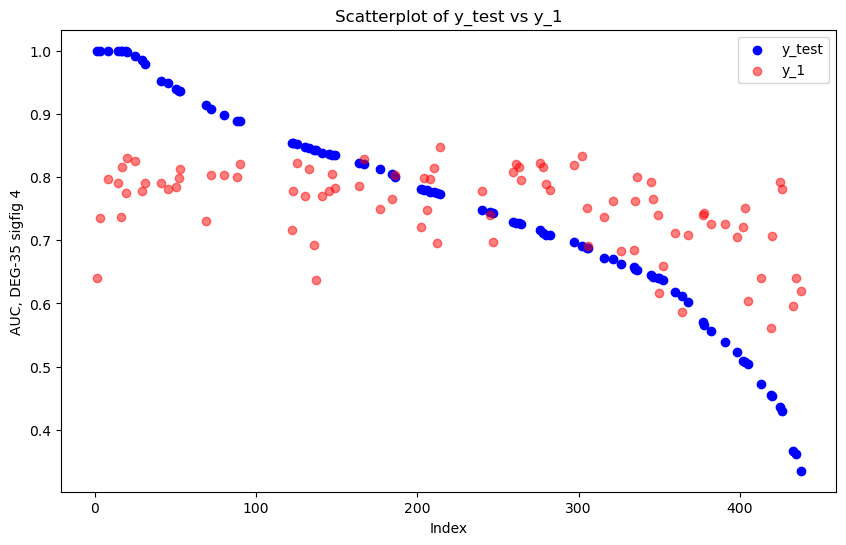

In [162]:
import matplotlib.pyplot as plt

# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_1_df = pd.DataFrame(y_1, index=y_test_df.index, columns=['y_1'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_1_df], axis=1)
combined_df.columns = ['y_test', 'y_1']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_1'], color='red', label='y_1', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_1')
plt.legend()
plt.show()

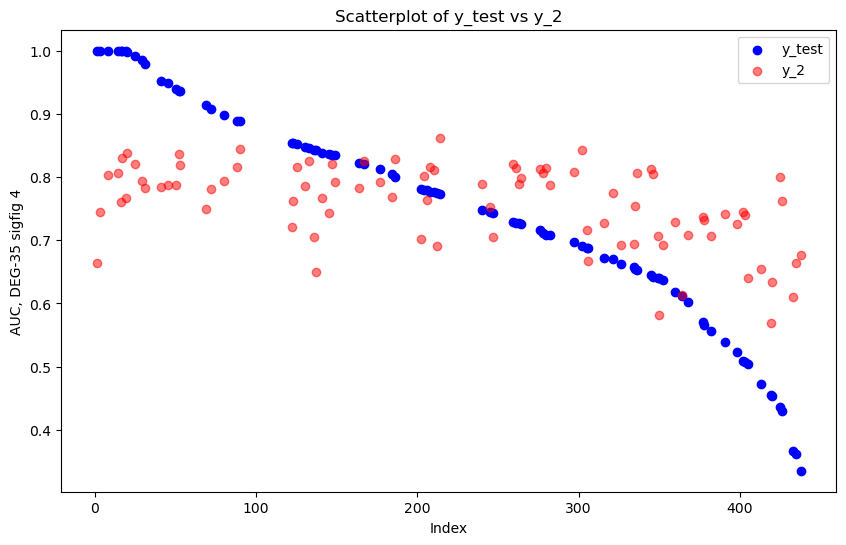

In [163]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_2_df = pd.DataFrame(y_2, index=y_test_df.index, columns=['y_2'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_2_df], axis=1)
combined_df.columns = ['y_test', 'y_2']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_2'], color='red', label='y_2', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_2')
plt.legend()
plt.show()

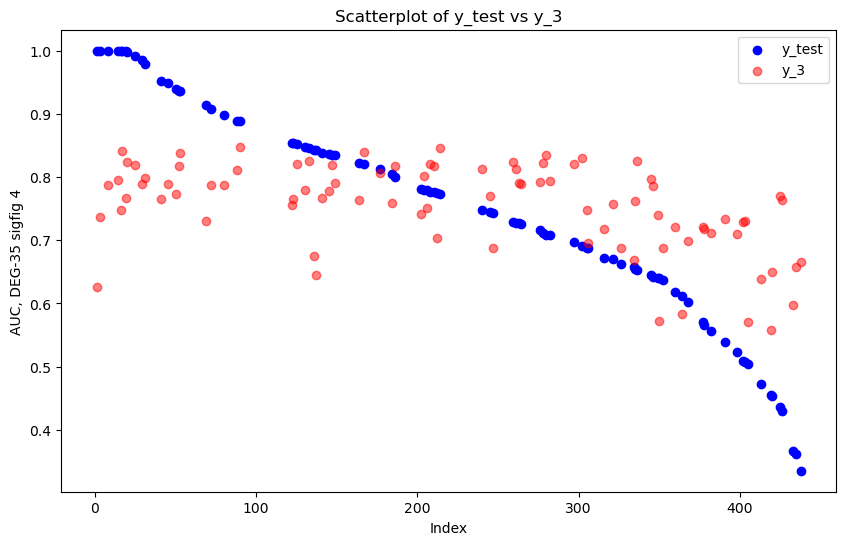

In [164]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_3_df = pd.DataFrame(y_3, index=y_test_df.index, columns=['y_3'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_3_df], axis=1)
combined_df.columns = ['y_test', 'y_3']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_3'], color='red', label='y_3', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_3')
plt.legend()
plt.show()

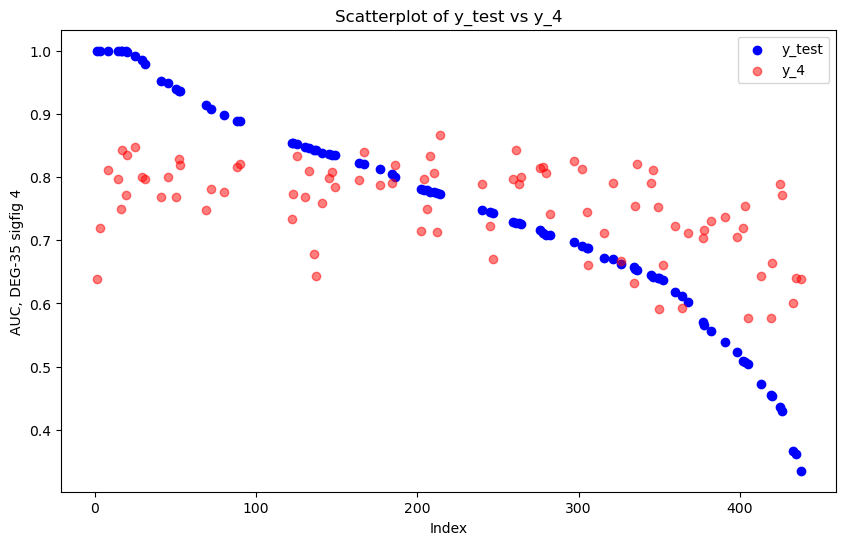

In [165]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_4_df = pd.DataFrame(y_4, index=y_test_df.index, columns=['y_4'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_4_df], axis=1)
combined_df.columns = ['y_test', 'y_4']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_4'], color='red', label='y_4', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_4')
plt.legend()
plt.show()

In [125]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_tree_1 = DecisionTreeRegressor(max_depth=2)
regr_tree_2 = DecisionTreeRegressor(max_depth=4)
regr_tree_3 = DecisionTreeRegressor(max_depth=6)
regr_tree_4 = DecisionTreeRegressor()
regr_tree_1.fit(X_train, y_train)
regr_tree_2.fit(X_train, y_train)
regr_tree_3.fit(X_train, y_train)
regr_tree_4.fit(X_train, y_train)

DecisionTreeRegressor()

In [126]:
#predict
y_tree_1 = regr_tree_1.predict(X_test)
y_tree_2 = regr_tree_2.predict(X_test)
y_tree_3 = regr_tree_3.predict(X_test)
y_tree_4 = regr_tree_4.predict(X_test)

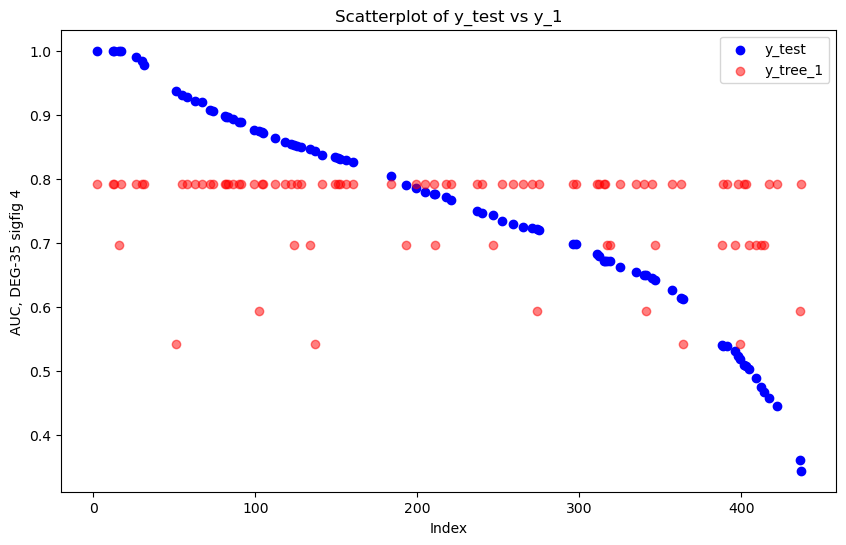

In [127]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_tree_1_df = pd.DataFrame(y_tree_1, index=y_test_df.index, columns=['y_tree_1'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_tree_1_df], axis=1)
combined_df.columns = ['y_test', 'y_tree_1']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_tree_1'], color='red', label='y_tree_1', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_1')
plt.legend()
plt.show()

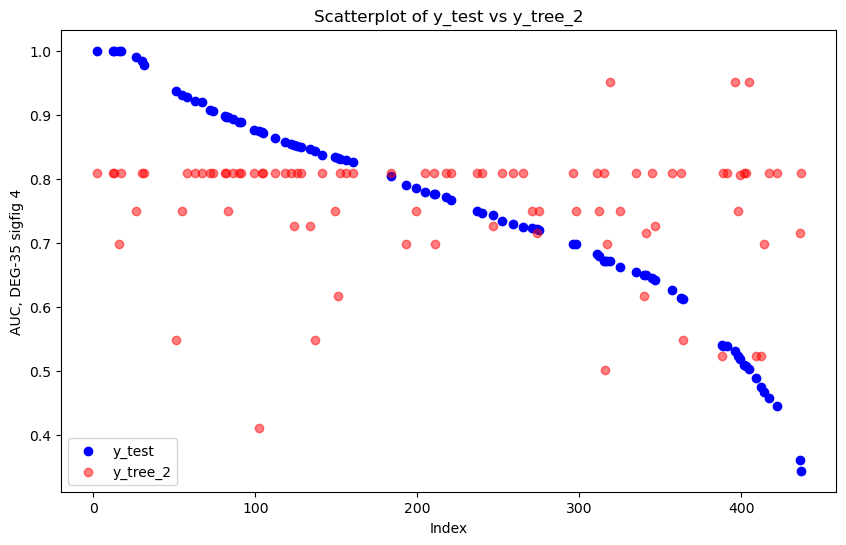

In [128]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_tree_2_df = pd.DataFrame(y_tree_2, index=y_test_df.index, columns=['y_tree_2'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_tree_2_df], axis=1)
combined_df.columns = ['y_test', 'y_tree_2']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_tree_2'], color='red', label='y_tree_2', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_tree_2')
plt.legend()
plt.show()

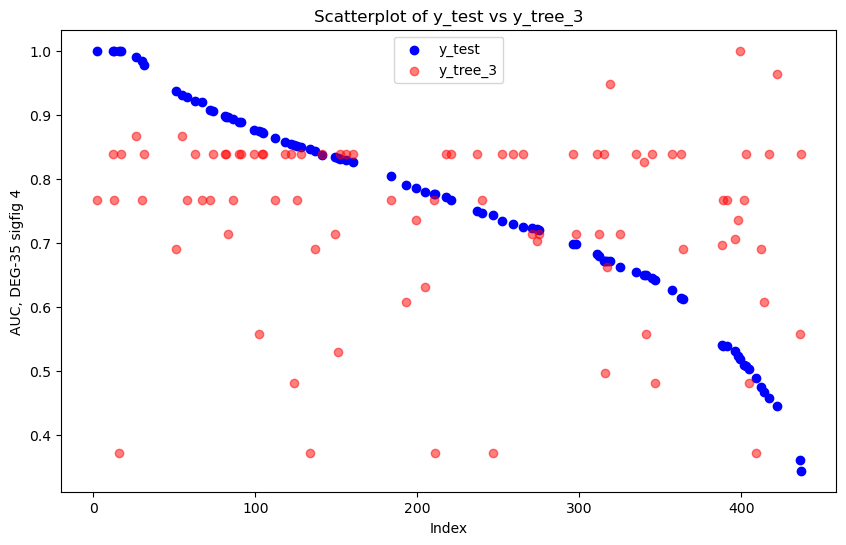

In [129]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_tree_3_df = pd.DataFrame(y_tree_3, index=y_test_df.index, columns=['y_tree_3'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_tree_3_df], axis=1)
combined_df.columns = ['y_test', 'y_tree_3']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_tree_3'], color='red', label='y_tree_3', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_tree_3')
plt.legend()
plt.show()

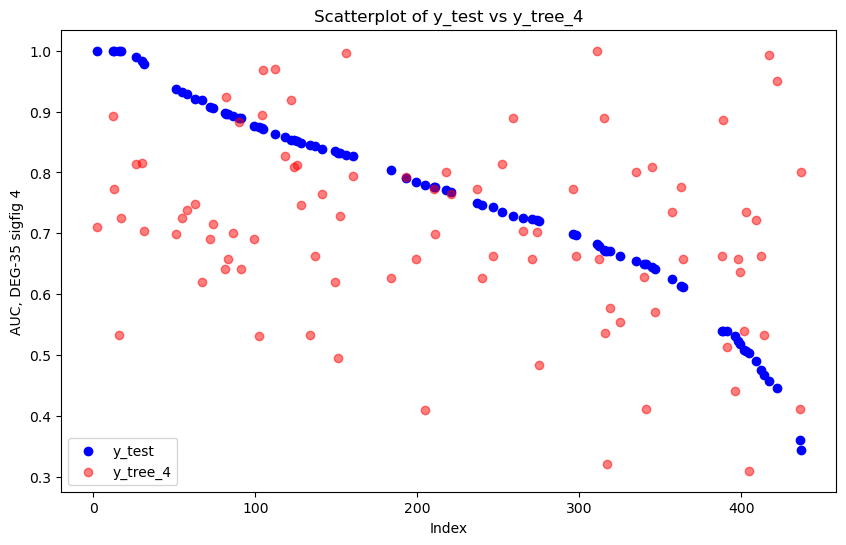

In [130]:
# Convert y_test to a DataFrame to keep the index
y_test_df = pd.DataFrame(y_test)

# Convert y_1 to a DataFrame and make sure it has the same index as y_test
y_tree_4_df = pd.DataFrame(y_tree_4, index=y_test_df.index, columns=['y_tree_4'])

# Combine y_test and y_1 into a single DataFrame
combined_df = pd.concat([y_test_df, y_tree_4_df], axis=1)
combined_df.columns = ['y_test', 'y_tree_4']

# Plot scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(combined_df.index, combined_df['y_test'], color='blue', label='y_test')
plt.scatter(combined_df.index, combined_df['y_tree_4'], color='red', label='y_tree_4', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('AUC, DEG-35 sigfig 4')
plt.title('Scatterplot of y_test vs y_tree_4')
plt.legend()
plt.show()